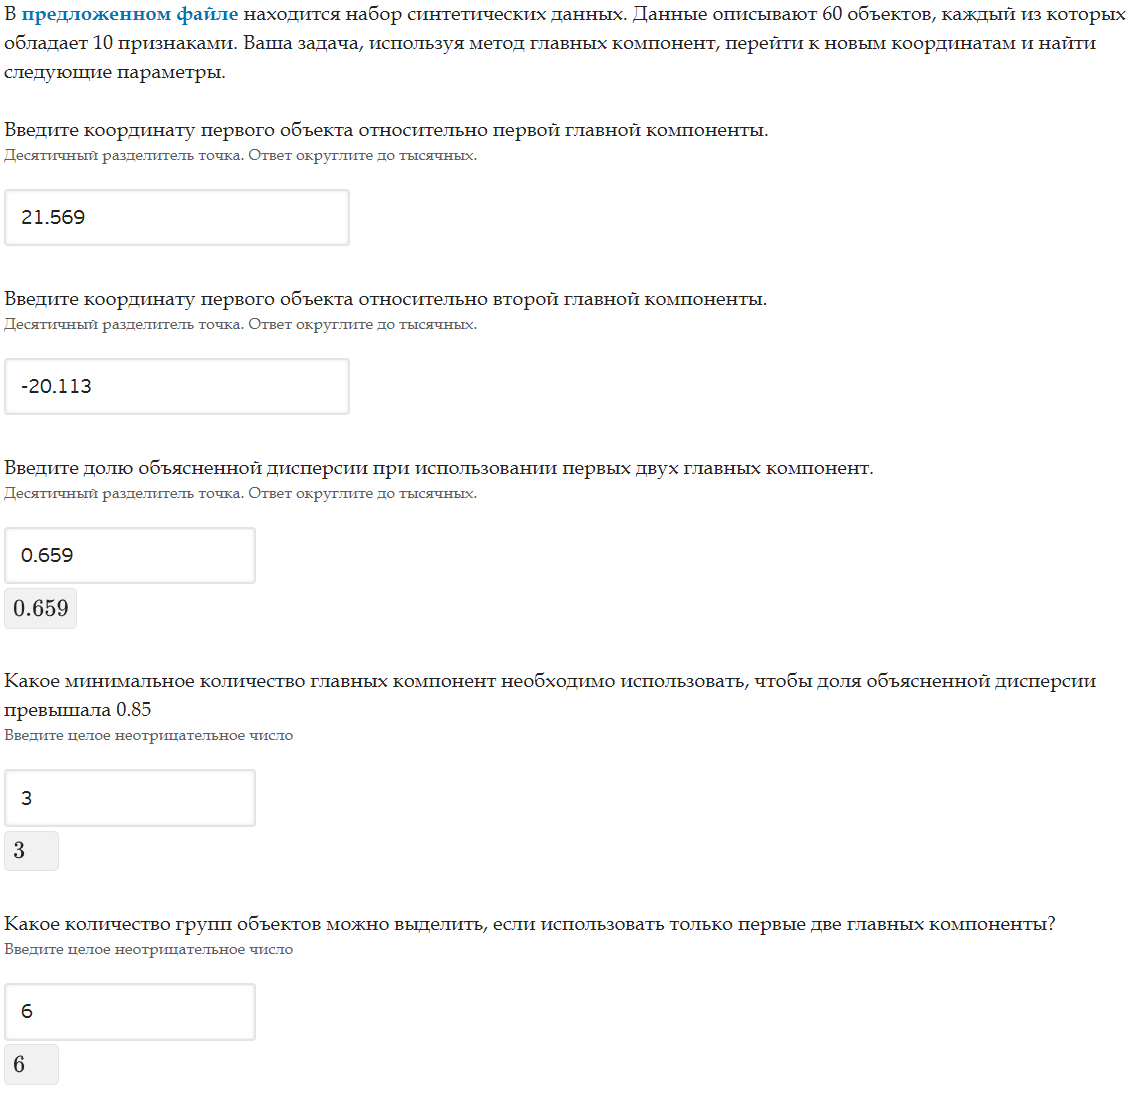

Координата первого объекта относительно первой главной компоненты: 21.568552499878685
Координата первого объекта относительно второй главной компоненты: -20.112664130640518
Доля объясненной дисперсии для первой главной компоненты: 0.43792926304608926
Доля объясненной дисперсии для второй главной компоненты: 0.22113176246906807
Доля объясненной дисперсии при использовании двух главных компонент: 0.6590610255151573
Доля объясненной дисперсии при 3 компонент равна= 0.8595901505644252


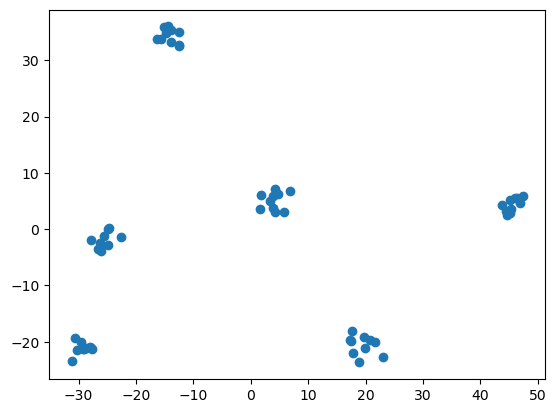

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

#загружаю дата сет
data = pd.read_csv('Datasets/72_36.csv', header=None)

#создается PCA
pca = PCA(n_components=2, svd_solver='full')

#
pca.fit(data)

# Преобразование данных с помощью PCA
new_data = pca.transform(data)

# для выделения групп
X_data = np.array(new_data)

# Получение координат первого объекта для 1 и 2 главной компоненты
obj1_coordinate_1 = new_data[0][0]
obj1_coordinate_2 = new_data[0][1]

print("Координата первого объекта относительно первой главной компоненты:", obj1_coordinate_1)
print("Координата первого объекта относительно второй главной компоненты:", obj1_coordinate_2)

# получение доли объясненой дисперсии
explained_var_ratio_1 = pca.explained_variance_ratio_[0]
explained_var_ratio_2 = pca.explained_variance_ratio_[1]

print("Доля объясненной дисперсии для первой главной компоненты:", explained_var_ratio_1)
print("Доля объясненной дисперсии для второй главной компоненты:", explained_var_ratio_2)
print("Доля объясненной дисперсии при использовании двух главных компонент:", explained_var_ratio_1 + explained_var_ratio_2)


# вычисляем мин. кол-во главных компонент
n_components = 0
explained_variance_ratio = 0

while explained_variance_ratio <= 0.85:
  n_components = n_components + 1
  pca = PCA(n_components=n_components, svd_solver='full').fit(data)
  explained_variance_ratio = pca.explained_variance_ratio_.sum()

print('Доля объясненной дисперсии при', n_components, 'компонент равна=', explained_variance_ratio)

plt.scatter(X_data[:,0], X_data[:,1])
plt.show()

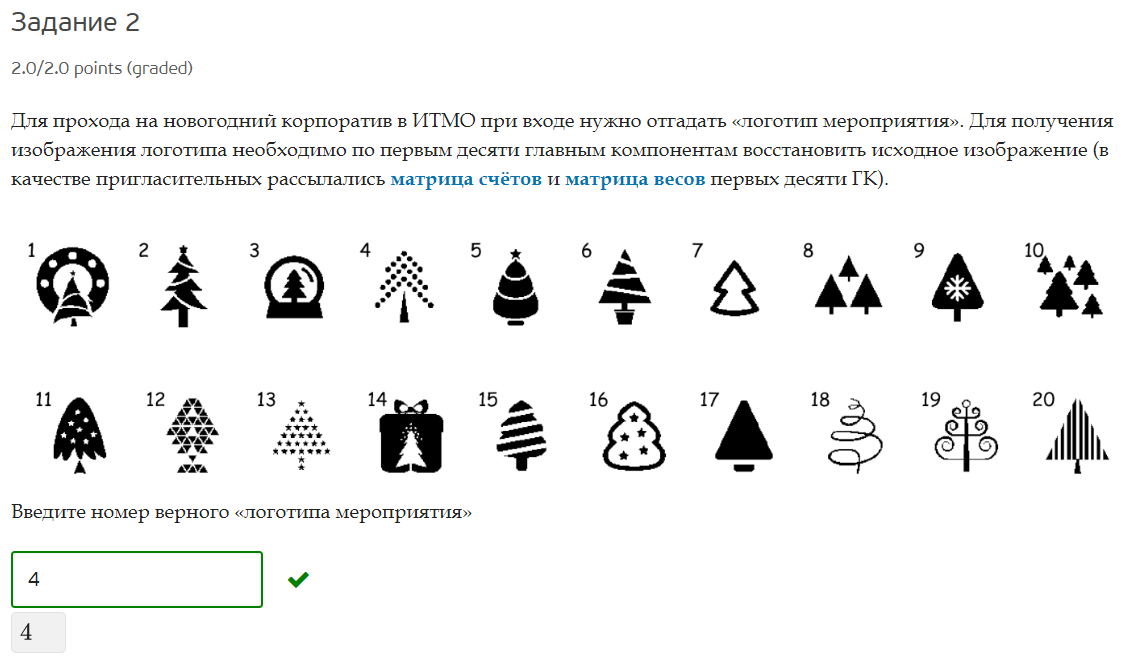

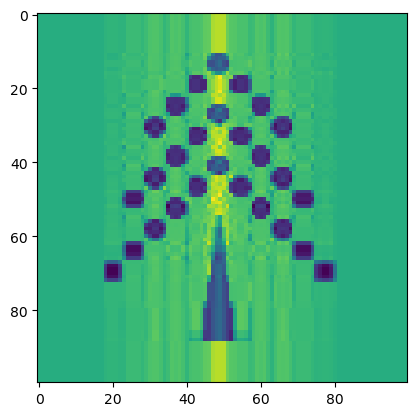

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

#загружаю дата сет
X_reduced = pd.read_csv('Datasets/X_reduced_408.csv', header=None, sep=';')
X_loadings = pd.read_csv('Datasets/X_loadings_408.csv', header=None, sep=';')

#создается PCA
X_loadings = X_loadings.T

result = X_reduced.dot(X_loadings)

plt.imshow(result)
plt.show()